### Load and Prepare the Data

In [170]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from minisom import MiniSom
import plotly.graph_objects as go
from plotly.subplots import make_subplots

data = pd.read_csv('winequality-red.csv', delimiter=';')

X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Scores

data.head()



fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

### Answer 1A

In [171]:

# Load the dataset
data1 = pd.read_csv('winequality-red.csv', delimiter=';')
data1['wine type'] = 'R'
data1['wine'] = 'Red'

data2 = pd.read_csv('winequality-white.csv', delimiter=';')
data2['wine type'] = 'W'
data2['wine'] = 'White'

df = pd.concat([data1, data2], ignore_index=True)

X = df.iloc[1:, :-3]  # Features
Y = df.iloc[:, -2]   # Wine Type

X = X.to_dict(orient='split')
X = X['data']
print(X)

Y = Y.to_dict()
Y = np.array(list(Y.values()))
print(Y)

[[7.8, 0.88, 0.0, 2.6, 0.098, 25.0, 67.0, 0.9968, 3.2, 0.68, 9.8], [7.8, 0.76, 0.04, 2.3, 0.092, 15.0, 54.0, 0.997, 3.26, 0.65, 9.8], [11.2, 0.28, 0.56, 1.9, 0.075, 17.0, 60.0, 0.998, 3.16, 0.58, 9.8], [7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4], [7.4, 0.66, 0.0, 1.8, 0.075, 13.0, 40.0, 0.9978, 3.51, 0.56, 9.4], [7.9, 0.6, 0.06, 1.6, 0.069, 15.0, 59.0, 0.9964, 3.3, 0.46, 9.4], [7.3, 0.65, 0.0, 1.2, 0.065, 15.0, 21.0, 0.9946, 3.39, 0.47, 10.0], [7.8, 0.58, 0.02, 2.0, 0.073, 9.0, 18.0, 0.9968, 3.36, 0.57, 9.5], [7.5, 0.5, 0.36, 6.1, 0.071, 17.0, 102.0, 0.9978, 3.35, 0.8, 10.5], [6.7, 0.58, 0.08, 1.8, 0.097, 15.0, 65.0, 0.9959, 3.28, 0.54, 9.2], [7.5, 0.5, 0.36, 6.1, 0.071, 17.0, 102.0, 0.9978, 3.35, 0.8, 10.5], [5.6, 0.615, 0.0, 1.6, 0.089, 16.0, 59.0, 0.9943, 3.58, 0.52, 9.9], [7.8, 0.61, 0.29, 1.6, 0.114, 9.0, 29.0, 0.9974, 3.26, 1.56, 9.1], [8.9, 0.62, 0.18, 3.8, 0.176, 52.0, 145.0, 0.9986, 3.16, 0.88, 9.2], [8.9, 0.62, 0.19, 3.9, 0.17, 51.0, 148.0, 0.9986, 3.17, 

/Users/bijo/anaconda3/lib/python3.11/site-packages/minisom.py:388: ComplexWarning:

Casting complex values to real discards the imaginary part



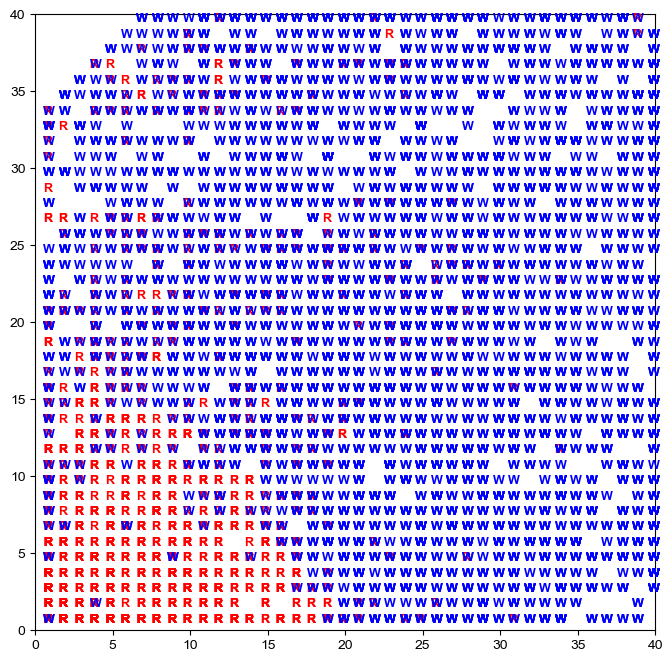

In [136]:
som = MiniSom(40, 40, 11, sigma=4,
              learning_rate=0.5, neighborhood_function='gaussian')

som.pca_weights_init(X)

# random training
som.train(X, 7000, random_order=True) 

label_to_color = {'R': 'red', 'W': 'blue'}

# Visualising SOM results
fig, ax = plt.subplots(figsize=(8, 8))

wmap = {}
im = 0
for x, t in zip(X, Y):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    color = label_to_color.get(t, 'black')
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=color, fontdict={'weight': 'bold', 'size': 9}, fontname='Arial')
    im = im + 1

ax.axis([0, som.get_weights().shape[0], 0, som.get_weights().shape[1]])
plt.rcParams.update({'font.family': 'Arial'})  # Set font family for all text
plt.savefig('som_wine.png', bbox_inches='tight',pad_inches = 0.25)
plt.show()

### Answer 1B 

**Red Wine**

In [172]:
df = data1.drop(['wine type'], axis = 1)
df = df.drop(['wine'], axis = 1)

# Define a custom color map for quality
color_map = {
    3: '#0E078B',  
    4: '#6501A6',
    5: '#A63989',
    6: '#D06967',  
    7: '#EFAD4F',
    8: '#F4FB58'   
}

# Melt the DataFrame to long format
df_melted = df.melt(id_vars='quality', var_name='attribute', value_name='value')

# Create subplots
num_attributes = df_melted['attribute'].nunique()
rows = (num_attributes // 4) + (num_attributes % 4 > 0)
fig = make_subplots(rows=rows, cols=4, subplot_titles=df_melted['attribute'].unique(), vertical_spacing=0.1)

# Add individual box plots to the subplots
for i, attribute in enumerate(df_melted['attribute'].unique()):
    row = i // 4 + 1
    col = i % 4 + 1
    
    # Create a box plot for the current attribute
    fig_box = px.box(df_melted[df_melted['attribute'] == attribute], 
                     x='quality', y='value', 
                     color='quality', 
                     color_discrete_map=color_map, 
                     template='plotly_dark')
    
    # Add traces from the box plot to the subplot
    for trace in fig_box['data']:
        fig.add_trace(trace, row=row, col=col)

# Define the tick values and tick labels for the x-axis
quality_values = df['quality'].unique()
quality_values.sort()
tickvals = list(quality_values)
ticktext = [str(val) for val in tickvals]

# Update layout to ensure all tick labels show up on x-axis
for i in range(1, rows + 1):
    for j in range(1, 5):
        fig.update_xaxes(tickvals=tickvals, ticktext=ticktext, row=i, col=j)
        fig.update_xaxes(title_font=dict(family='Arial', size=12, color='black'), row=i, col=j)
        fig.update_yaxes(title_font=dict(family='Arial', size=12, color='black'), row=i, col=j)

# Update subplot titles to use Arial font
for annotation in fig['layout']['annotations']:
    annotation['font'] = dict(family='Arial', size=12, color='black')

fig.update_layout(
    title_text='Red Wine: Distribution of Attributes by Quality',
    title_font=dict(family='Arial', size=16, color='black'),
    showlegend=False,
    height=800,
    width=1500
)

# Show the plot
fig.show()

**White Wine**

In [173]:
df = data2.drop(['wine type'], axis = 1)
df = df.drop(['wine'], axis = 1)

# Define a custom color map for quality
color_map = {
    3: '#0E078B',  
    4: '#5D02A5',
    5: '#8F2698',
    6: '#BE5377',  
    7: '#DE805B',
    8: '#F1B84E',
    9: '#F4FB58'   
}

# Melt the DataFrame to long format
df_melted = df.melt(id_vars='quality', var_name='attribute', value_name='value')

# Create subplots
num_attributes = df_melted['attribute'].nunique()
rows = (num_attributes // 4) + (num_attributes % 4 > 0)
fig = make_subplots(rows=rows, cols=4, subplot_titles=df_melted['attribute'].unique(), vertical_spacing=0.1)

# Add individual box plots to the subplots
for i, attribute in enumerate(df_melted['attribute'].unique()):
    row = i // 4 + 1
    col = i % 4 + 1
    
    # Create a box plot for the current attribute
    fig_box = px.box(df_melted[df_melted['attribute'] == attribute], 
                     x='quality', y='value', 
                     color='quality', 
                     color_discrete_map=color_map, 
                     template='plotly_dark')
    
    # Add traces from the box plot to the subplot
    for trace in fig_box['data']:
        fig.add_trace(trace, row=row, col=col)

# Define the tick values and tick labels for the x-axis
quality_values = df['quality'].unique()
quality_values.sort()
tickvals = list(quality_values)
ticktext = [str(val) for val in tickvals]

# Update layout to ensure all tick labels show up on x-axis
for i in range(1, rows + 1):
    for j in range(1, 5):
        fig.update_xaxes(tickvals=tickvals, ticktext=ticktext, row=i, col=j)
        fig.update_xaxes(title_font=dict(family='Arial', size=12, color='black'), row=i, col=j)
        fig.update_yaxes(title_font=dict(family='Arial', size=12, color='black'), row=i, col=j)

# Update subplot titles to use Arial font
for annotation in fig['layout']['annotations']:
    annotation['font'] = dict(family='Arial', size=12, color='black')

fig.update_layout(
    title_text='White Wine: Distribution of Attributes by Quality',
    title_font=dict(family='Arial', size=16, color='black'),
    showlegend=False,
    height=800,
    width=1500
)

# Show the plot
fig.show()

### Answer 1C 

**Red Wine**

In [137]:
df = data1.drop(['wine type'], axis = 1)

fig = px.parallel_coordinates(df, color="quality", labels={
        'fixed acidity': 'Fixed Acidity', 'volatile acidity': 'Volatile Acidity', 'citric acid': 'Citric Acid',
        'residual sugar': 'Residual Sugar', 'chlorides': 'Chlorides', 'free sulfur dioxide': 'Free Sulfur Dioxide',
        'total sulfur dioxide': 'Total Sulfur Dioxide', 'density': 'Density', 'pH': 'pH', 'sulphates': 'Sulphates',
        'alcohol': 'Alcohol', 'quality': 'Quality'},
        color_continuous_scale=px.colors.sequential.Plasma, template='plotly_dark', height = 600)

fig.update_layout(
    font=dict(
        family="Arial, sans-serif",
        size=14,
        color="white"
    ),
    paper_bgcolor='rgb(30, 30, 30)',
    plot_bgcolor='rgb(30, 30, 30)',
    margin=dict(l=100)
)

for dim in fig.data[0]['dimensions']:
    if dim['label'] == 'Quality':
        dim['tickvals'] = list(range(int(df['quality'].min()), int(df['quality'].max()) + 1))
        dim['ticktext'] = [str(x) for x in dim['tickvals']]

fig.show()

**White Wine**

In [47]:
df = data2.drop(['wine type'], axis = 1)

fig = px.parallel_coordinates(df, color="quality", labels={
        'fixed acidity': 'Fixed Acidity', 'volatile acidity': 'Volatile Acidity', 'citric acid': 'Citric Acid',
        'residual sugar': 'Residual Sugar', 'chlorides': 'Chlorides', 'free sulfur dioxide': 'Free Sulfur Dioxide',
        'total sulfur dioxide': 'Total Sulfur Dioxide', 'density': 'Density', 'pH': 'pH', 'sulphates': 'Sulphates',
        'alcohol': 'Alcohol', 'quality': 'Quality'},
        color_continuous_scale=px.colors.sequential.Plasma, template='plotly_dark', height = 600)

fig.update_layout(
    font=dict(
        family="Arial, sans-serif",
        size=14,
        color="white"
    ),
    paper_bgcolor='rgb(30, 30, 30)',
    plot_bgcolor='rgb(30, 30, 30)',
    margin=dict(l=100)
)

for dim in fig.data[0]['dimensions']:
    if dim['label'] == 'Quality':
        dim['tickvals'] = list(range(int(df['quality'].min()), int(df['quality'].max()) + 1))
        dim['ticktext'] = [str(x) for x in dim['tickvals']]

fig.show()